# Proj 3 Code Component MAD 2502 Spring 2023
## Name: Blake Wood

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

### Question 1 Part A (20 points)

Create a class called *my_monimal_fit(x_data, y_data, m)* that calculates the best fit line through the monomial $y=ax^m$ for the data set *x_data* and *y_data*. Make sure to set $m=1$ if not specified. 
- Create an **exception** if $m\le0$ or len$(x) \not= $ len$(y)$
- self.a will return the value of $a$. Use **optimize.curve_fit** from **scipy** for each fit.
- self.ymean will return the mean of y.  
- Write a method called *SSres()* that returns the numerical value $\displaystyle \sum_{i=1}^n(y_i - a \cdot x_i^m)^2$ 
- Write a method called *SSreg()* that returns the numerical value $\displaystyle \sum_{i=1}^n(a \cdot x_i^m - \bar{y})^2$ where $\bar{y}$ is the mean of all $y_i$'s..
- Write a method called *SStot()* that returns $SSreg + SSres = \displaystyle \sum_{i=1}^n(y_i - \bar{y})^2$
- Write a method called *R2* that returns the $R^2 = \dfrac{SSreg}{SStot}$.
- write a method called display that shows shows a graph of the data points with the curve. The title should say the data with with the equation of the line. Hint: Use the min and max of x-data to the set the domain of the min and max of the y-data to set the range of the plot. 
- Create a **\_\_str\_\_** method that prints the value of $a$ with the $R^2$ value clearly labeled. 


In [8]:
class my_monomial_fit(object):
    def __init__(self, x_data, y_data, m = 1):
        # default value for m is 1
        if m <= 0 or len(x_data) != len(y_data):
            # create an error is m is negative or if the length of the x_data is not equal to the length of the y_data
            raise ValueError("Invalid input")
        self.x = np.array(x_data)
        self.y = np.array(y_data)
        self.m = m
        # fit a curve and find the optimal value of self.a
        # optimize.curve_fit returns 2 values but we only want the first, so _ is used to discard the second value
        self.a, _ = optimize.curve_fit(self.monomial, self.x, self.y)
        self.ymean = np.mean(self.y)
    
    def monomial(self, x, a):
        return a * np.power(x, self.m)
    
    def SSres(self):
        # Compute the sum of squared residuals
        return np.sum(np.power(self.y - self.monomial(self.x, self.a), 2))
    
    def SSreg(self):
        # Compute the sum of squared regression
        return np.sum(np.power(self.monomial(self.x, self.a) - self.ymean, 2))
    
    def SStot(self):
        # Compute the total sum of squares
        return self.SSres() + self.SSreg()
    
    def R2(self):
        # Compute the coefficient of determination
        return self.SSreg() / self.SStot()
    
    def display(self):
        x_min = np.min(self.x)
        x_max = np.max(self.x)
        y_min = np.min(self.y)
        y_max = np.max(self.y)
        plt.scatter(self.x, self.y) # plot the x and y values
        plt.plot(np.linspace(x_min, x_max, 100), self.monomial(np.linspace(x_min, x_max, 100), self.a))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Data with y = {self.a[0]}x^{self.m}')
        plt.xlim(x_min, x_max) # sets the range of values for the x axis and y axis
        plt.ylim(y_min, y_max)
        plt.show()
        
    def __str__(self):
        return f"a = {self.a[0]}, R^2 = {self.R2()}"
    

In [9]:
#Sample output
x = np.array([1, 2, 4,  5])
y = np.array([0, 5, 15, 26])

data_1 = my_monomial_fit(x, y, 2)
print(data_1) #Should display: a = 1.0133630289532294 with R^2 = 0.989971205026032

a = 1.0133630290186562, R^2 = 0.9899712050273378


In [10]:
print(data_1.ymean)   #Output: 11.5

11.5


In [12]:
print(data_1.SSreg()) #Output: 379.022271714922

379.0222717647773


In [13]:
print(data_1.SSres()) #Output: 3.83964365256125

3.839643652561245


In [14]:
print(data_1.SStot()) #Output: 382.861915367483

382.86191541733854


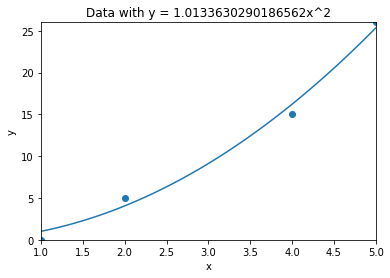

In [15]:
data_1.display()
##Hint: create a new list called x1 that starts at a = x.min()-1 and goes to  b = x.max()+1 with 
##stepsize (b-a)/100 to create a nice smooth curve. 

### Question 1 Part B (5 points)
- Load a CSV file called **data.csv** of two columns of x and y using **np.loadtxt** in Python.
- Use the class you made for part A to compute the coefficient of determination ($R^2$) for the model $y= ax^m$ with $m = 1$, $m = 2$, and $m = 3$. Which one is the best fit?
- Be sure to close the file!

In [16]:
with open('data.csv') as file:
    # this makes sure that the file is closed after it is read
    data = np.loadtxt(file, delimiter = ',')
    x_data = data[:, 0] # set the x and y data from the input file
    y_data = data[:, 1]

m1 = my_monomial_fit(x_data, y_data, 1)
m2 = my_monomial_fit(x_data, y_data, 2)
m3 = my_monomial_fit(x_data, y_data, 3)

print(f"m1: {m1}")
print(f"m2: {m2}")
print(f"m3: {m3}")

m1: a = -0.004584699220314036, R^2 = 0.35845195803460017
m2: a = 2.0081192647715147, R^2 = 0.999955287293442
m3: a = -5.806783337258814e-05, R^2 = 0.3584519424824685


#### Type in here to tell me which one fits best!
Here is where you will tell me which $m$ value worked the best and how do you know that. Was it $m=1$, $m=2$ or $m=3$?

According to the R^2 values, $m=2$ is the best fit. A value closer to 1 indicates that the fit is better.

***
### Question 2 Part A (10 points)

Let $0\le t \le 2\pi$ and fix $a$ and $b$. 

$$\begin{align}
x(t) &= \cos(at)\\
y(t) &= \sin(bt)
\end{align}$$

Create a function called *cool_graph(a, b, n)* where $n$ is the number points. 

**Hint**: Let t = np.arange(0, 2*np.pi, 2*np.pi/n) and include plt.grid()

In [17]:
def cool_graph(a, b, n):
    t = np.arange(0, 2 * np.pi, 2 * np.pi / n)
    x = np.cos(a * t)
    y = np.sin(b * t)
    
    plt.plot(x, y)
    plt.xlabel('X') # label the graph
    plt.ylabel('Y')
    plt.title(f"x(t)=cos({a}t), y(t)=sin({b}t), n={n}")
    plt.grid()
    plt.show()

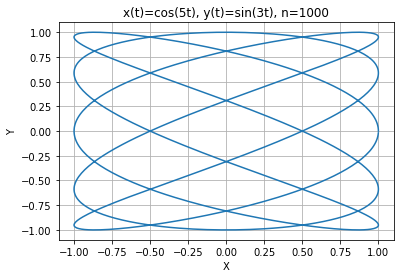

In [18]:
cool_graph(5, 3, 1000) 

### Question 2 Part B (10 points)

Write a Python program that graphs the function $f(x) = x*\sin(x)$ and its first and second derivatives, $f'(x)$ and $f''(x)$, on the same plot using the Matplotlib library. You may take the derivatives by hand and hard code the derivatives. 

- The user is asked for three inputs: **x_start**, **x_stop** and **step_size**
- Use **plot()** to plot all three functions on the same plot.
- Add a title, x-label, y-label and a legend to the graph.

Input x_start: -5
Input x_stop: 5
Input step_size: 0.5


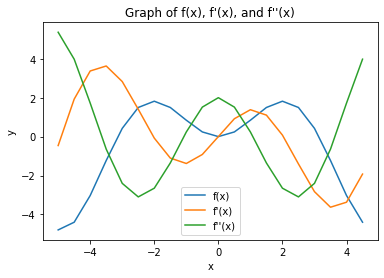

In [20]:
def f(x):
    return x * np.sin(x) # set the initial function

def f_prime(x):
    return np.sin(x) + x * np.cos(x) # the first derivative of the initial function

def f_double_prime(x):
    return 2 * np.cos(x) - x * np.sin(x) # the second derivative of the initial function

x_start = float(input("Input x_start: "))
x_stop = float(input("Input x_stop: "))
step_size = float(input("Input step_size: "))

x = np.arange(x_start, x_stop, step_size)
y = f(x) # set y to the result of the original function
y_prime = f_prime(x) # set y-prime to the result of the first derivative
y_double_prime = f_double_prime(x) # set y-double-prime to the result of the second derivative

plt.plot(x, y, label = "f(x)") # plot the original function
plt.plot(x, y_prime, label = "f'(x)") # plot the first derivative
plt.plot(x, y_double_prime, label = "f''(x)") # plot the second derivative
plt.title("Graph of f(x), f'(x), and f''(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

---
## Question 3 (20 Points)

-    Open the file **story.txt** using the **open()** function and the read mode.
-    Read the contents of the file into a string variable called text.
-    Split the text string into a list of individual words using the **split()** method.
-    Create a set of unique words from the list of words using the **set()** constructor.
-    Open a new file called **words.txt** using the **open()** function and the write mode.
-    Write each unique word to the file, one per line, using a for loop that iterates over the sorted list of unique words.
-    Close both files using the **close()** method.

Hint: Go back at the example I did in class with the palindromes. It was in the unit on recursion. 

In [21]:
def to_chars(s):
    """
    Convert string to lowercase with only alphabetical characters.

    Args:
        s (str): The string to convert.

    Returns:
        str: Lowercase string with only alphabetical characters.
    """
    # Convert to lowercase
    s = s.lower()

    # Store alphabetical characters
    letters = ''

    # Iterate over characters
    for c in s:
        # Add alphabetical characters to 'letters' string
        if c in 'abcdefghijklmnopqrstuvwxyz':
            letters += c

    # Return the resulting string
    return letters


In [22]:
with open('story.txt', 'r') as file: # open the file 'story.txt' to read
    text = file.read()
    
word_list = text.split() # split up the text into individual words

unique_words = set() # initialize an empty set
for word in word_list:
    unique_words.add(to_chars(word)) # add each word to the set... the set will automatically remove duplicates

with open('words.txt', 'w') as file: # open the file 'words.txt' to write
    for word in sorted(unique_words):
        file.write(f"{word}\n") # write the words and a newline to the file in sorted order
        
file.close() # close the file

---
### Question 4 (20 Points)

You are given the following Parabola class that is incomplete. Here is what needs to be fixed:

- The method for graphing the class Parabola does NOT work when $a=0$. This is because the graph function uses the vertex to center the graph. Modify the code so that the graph function will graph a line with $a=0$.

- Finish up the method called **real_roots** here are all the cases: 
    - If $a$, $b$, and $c$ are all zero, then every value of $x$ is a real solution. Print out 'All real values'
    - If $a$ and $b$ are zero, but $c$ is nonzero, then there are no real roots. Print out 'No real Roots'
    - If $a$ is zero, and $b$ is nonzero, then the only root is $root = \dfrac{-c}{b}$. Print out the "There is one root: {root}" 
    - If $a$ is nonzero and $b^2 - 4ac <0$, then there are no real roots. Print "No real roots"
    - If $a$ is nonzero and $b^2 - 4ac =0$, then there is only real root, namely $root = \dfrac{-b}{2a}$. Print out the "There is one root: {root}"
    - If $a$ is nonzero and $b^2 - 4ac >0$, then there are two roots, namely 
    $$root1 = \dfrac{-b - \sqrt{b^2-4ac}}{2a} \hspace{1cm} root2 = \dfrac{-b + \sqrt{b^2-4ac}}{2a}$$


In [23]:
class Parabola():
    """A class for Parabolas"""

    def __init__(self, a, b, c):
        """initialize the polynomial with 3 values"""
        self.a = a
        self.b = b
        self.c = c
    
    def f(self, x):
        """Evaluate the polynomial at x"""
        return self.a * x**2 + self.b*x +self.c
    
    def __str__(self):
        """Prints the polynomial"""
        return f'({self.a})x^2 + ({self.b})x + ({self.c})'
    
    def vertex_x(self):
        """Computes the x value of the vertex"""
        if self.a == 0: # if self.a is 0, the x-vertex is calculated differently
            return -1 * self.c / self.b
        else:
            return -1*self.b /(2.0 * self.a)
        
    def vertex_y(self):
        """Computes the y value of the vertex"""
        if self.a == 0: # if self.a is 0, the y-vertex is calculated differently
            return self.c
        else:
            return self.f( self.vertex_x() )
        
    def print_vertex(self):
        """Prints the vertex as a coordinate"""
        print(f'The vertex is ({self.vertex_x()}, {self.vertex_y()})')

        
    def graph(self):
        """A graph is produced of the parabola where the vertex is the center, and the
        domain of the function is five integers to the left and right of the vertex_x. 
        The range is set to be the set of all y-values. The vertex is a point, and the there
        is an arrow that specifies whether or not the the vertex is a max or min."""
        
        listx = np.arange(-5., 5., 0.2) + self.vertex_x() #puts the vertex in the middle
        plt.plot(listx, self.f( listx ), 'r-')  #red solid line
        plt.xlabel('x-values') #label x-axis
        plt.ylabel('y-values') #label y-axis
        plt.title( '(' + str(self.a) + ')' +'$x^2$ + ' + '(' + str(self.b) + ')' + '$x + $' + '(' + str(self.c) + ')' )
        if self.a != 0:
            plt.plot(self.vertex_x(),self.vertex_y(),'ro',label = 'Vertex') 
        if self.a > 0:
            plt.annotate('Min', xy=(self.vertex_x(), self.vertex_y()), xytext=(self.vertex_x()+2, self.vertex_y()+1),arrowprops=dict(facecolor='black', shrink=0.05),)
        elif self.a < 0:
            plt.annotate('Max', xy=(self.vertex_x(), self.vertex_y()), xytext=(self.vertex_x()-2, self.vertex_y()-1),arrowprops=dict(facecolor='black', shrink=0.05),)
        if self.a != 0:
            plt.legend()
        plt.show()
        
    def real_roots(self):
        """Returns the roots (if any) of the Parabola"""
        if self.a == 0 and self.b == 0 and self.c == 0:
            print('All real values')
        elif self.a == 0 and self.b == 0:
            print('No real Roots')
        elif self.a == 0:
            root = -self.c/self.b
            print(f'There is one root: {root}')
        else: # all of the input values are real numbers
            discriminant = self.b**2 - 4 * self.a * self.c
            if discriminant < 0:
                print("No real roots")
            elif discriminant == 0:
                # calculate the one root
                root = -self.b / (2 * self.a)
                print(f"There is one root: {root}")
            else:
                # calculate two roots
                root1 = (-self.b - np.sqrt(discriminant)) / (2 * self.a)
                root2 = (-self.b + np.sqrt(discriminant)) / (2 * self.a)
                print(f"There are two roots: {root1} and {root2}")
                

(1)x^2 + (-1)x + (-6)


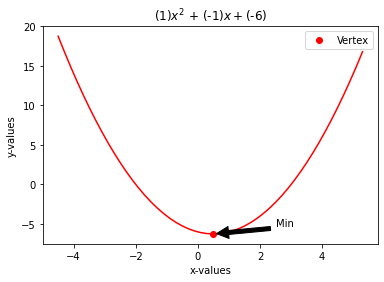

In [24]:
func = Parabola(1,-1,-6)
print(func)
func.graph()

(0)x^2 + (-2)x + (5)


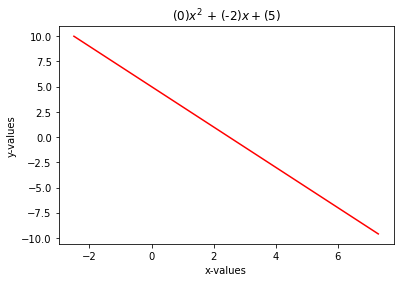

In [25]:
func2 = Parabola(0,-2,5)
print(func2)

func2.graph()

In [26]:
func = Parabola(1,-1,-6)
func.real_roots() 

There are two roots: -2.0 and 3.0
